## DSC530 Final Project

Nitin Mahajan

### Data Set 
For the final project **[used car database](https://www.kaggle.com/piumiu/used-cars-database-50000-data-points)** dataset has been used and is obtained from kaggle. 

In [46]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set(style="white")
from pandas_profiling import ProfileReport

# ensuring graphs are displayed within same notebook, rather than new window
%matplotlib inline

In [47]:
import pandas_profiling

### Importing Data

In [48]:
# Get absolute path till the raw data file
abs_path = os.getcwd()
data_path = abs_path + "/RawData1/autos.csv"
import pandas as pd
# reading csv into raw dataframe
autos= pd.read_csv(data_path,encoding="latin-1")

In [49]:
autos.shape

(50000, 20)

In [50]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

`Brief observation:`

- The dataset consists of 20 columns
- 15 columns contain data of object type, 5 columns are int.64 type. 
- 5 columns have missing values, but none of them contain more than 20% missing values
- camelcase in column names is needed to be changed to snakecase

In [51]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 
                 'ab_test','vehicle_type', 'registration_year', 'gearbox', 
                 'power_ps', 'model','odometer', 'registration_month', 
                 'fuel_type', 'brand','unrepaired_damage', 'ad_created', 
                 'num_photos', 'postal_code','last_seen']

In [52]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


`OBSERVATION`

- Columns with mostly one values are: seller, offer_type, num_photos. These columns are candidates to be dropped, because no useful information can be extracted.
- Numeric data stored as text: price, odometer.
- Column ad_created needs further investigation, so far it seems that it consists of just one value
- Let's drop three columns: seller, offer_type, num_photos

In [53]:
autos = autos.drop(columns=['seller','offer_type','num_photos'])

Next, I am going to convert the data in these two columns to numeric type and rename column odometer

In [54]:
#converting column 'price' from object to numeric type
autos['price'] = (autos['price']
                 .str.replace('$','')
                 .str.replace(',','')
                  .astype(float)
                 )

In [55]:
#converting column 'odometer' from object to numeric type
autos['odometer'] = (autos['odometer']
                    .str.replace(',','')
                    .str.replace('km','')
                    .astype(float)
                    )

In [56]:
#renaming the column 'odometer' to 'odometer_km'
autos = autos.rename({'odometer':'odometer_km'}, axis=1)

In [57]:
print(autos['price'].unique().shape)
print(autos['price'].describe())
print(autos['price'].value_counts().head(20))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
999.0      434
750.0      433
900.0      420
650.0      419
850.0      410
700.0      395
4500.0     394
300.0      384
2200.0     382
950.0      379
Name: price, dtype: int64


`Observation`

- There are 2357 unique values in column price.
- Around 3% of prices equal 0, these rows might be considered for removing from the dataset.
- The minimum price is 0 and maximum price is one hundred million dollars, they look too small and too large respectively.
- Let's explore the lowest and the highest prices further on.

In [58]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [59]:
autos['price'].value_counts().sort_index(ascending=True).head(20)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

In [60]:
autos = autos[autos['price'].between(1,350000)]
autos['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

In [61]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000.0    31414
125000.0     5057
100000.0     2115
90000.0      1734
80000.0      1415
70000.0      1217
60000.0      1155
50000.0      1012
40000.0       815
30000.0       780
20000.0       762
10000.0       253
5000.0        836
Name: odometer_km, dtype: int64

In [62]:
autos[['date_crawled','last_seen',
      'ad_created','registration_month',
      'registration_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48565 entries, 0 to 49999
Data columns (total 5 columns):
date_crawled          48565 non-null object
last_seen             48565 non-null object
ad_created            48565 non-null object
registration_month    48565 non-null int64
registration_year     48565 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.2+ MB


In [63]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [64]:
(autos['date_crawled']
 .str[:10]
 .value_counts(normalize=True,dropna=False)
 .sort_index()
)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [65]:
(autos['date_crawled']
 .str[:10]
 .value_counts(normalize=True,dropna=False)
 .sort_values()
)

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-04-01    0.033687
2016-03-30    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: date_crawled, dtype: float64

In [66]:
(autos['last_seen']
 .str[:10]
 .value_counts(normalize=True,dropna=False)
 .sort_index()
)

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

In [67]:
print(autos["ad_created"].str[:10].unique().shape)
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

(76,)


2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

In [68]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [69]:
(~autos['registration_year'].between(1900,2016)).sum()/autos.shape[0]

0.038793369710697

In [70]:
autos = autos[autos['registration_year'].between(1900,2016)]
autos['registration_year'].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

In [71]:
autos['brand'].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

In [72]:
brand_counts = autos['brand'].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [73]:
brand_mean_prices = {}

for b in common_brands:
    b_only = autos[autos['brand'] == b]
    mean_price = b_only['price'].mean()
    brand_mean_prices[b] = int(mean_price)

brand_mean_prices

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

In [74]:
brand_mean_mileage = {}
for b in common_brands:
    b_only = autos[autos['brand'] == b]
    mean_mil = b_only['odometer_km'].mean()
    brand_mean_mileage[b] = int(mean_mil)
    

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_price = pd.Series(brand_mean_prices).sort_values(ascending=False)

In [75]:
brand_agg = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_agg

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [76]:
brand_agg['mean_price'] = mean_price
brand_agg

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


In [77]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [78]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [79]:
autos['unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

In [80]:
# German to English
words_translated = {
    'bus':'bus',
    'limousine':'limousine',
    'kleinwagen':'supermini',
    'kombi':'station_wagon',
    'coupe':'coupe',
    'suv':'suv',
    'cabrio':'cabrio',
    'andere' :'other',
    'manuell':'manual',
    'automatik':'automatic',
    'lpg':'lpg',
    'benzin':'petrol',
    'diesel':'diesel',
    'cng':'cng',
    'hybrid':'hybrid',
    'elektro':'electro',
    'nein':'no',
    'ja':'yes'
}
for each in ['vehicle_type','gearbox','fuel_type','unrepaired_damage']:
    autos[each] = autos[each].map(words_translated)

In [81]:
print(autos['vehicle_type'].unique())
print(autos['gearbox'].unique())
print(autos['fuel_type'].unique())
print(autos['unrepaired_damage'].unique())

['bus' 'limousine' 'supermini' 'station_wagon' nan 'coupe' 'suv' 'cabrio'
 'other']
['manual' 'automatic' nan]
['lpg' 'petrol' 'diesel' nan 'cng' 'hybrid' 'electro' 'other']
['no' nan 'yes']


In [82]:
date_cols = ['date_crawled','ad_created','last_seen']

for each in date_cols:
    autos[each] = (autos[each]
                  .str[:10]
                  .str.replace('-','')
                  .astype(int)
                  )

In [83]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46681 entries, 0 to 49999
Data columns (total 17 columns):
date_crawled          46681 non-null int64
name                  46681 non-null object
price                 46681 non-null float64
ab_test               46681 non-null object
vehicle_type          43977 non-null object
registration_year     46681 non-null int64
gearbox               44571 non-null object
power_ps              46681 non-null int64
model                 44488 non-null object
odometer_km           46681 non-null float64
registration_month    46681 non-null int64
fuel_type             43363 non-null object
brand                 46681 non-null object
unrepaired_damage     38374 non-null object
ad_created            46681 non-null int64
postal_code           46681 non-null int64
last_seen             46681 non-null int64
dtypes: float64(2), int64(7), object(8)
memory usage: 6.4+ MB


In [84]:
# Handling missing values
autos = autos.dropna()

In [85]:
#Final Data Set
autos.shape

(34584, 17)

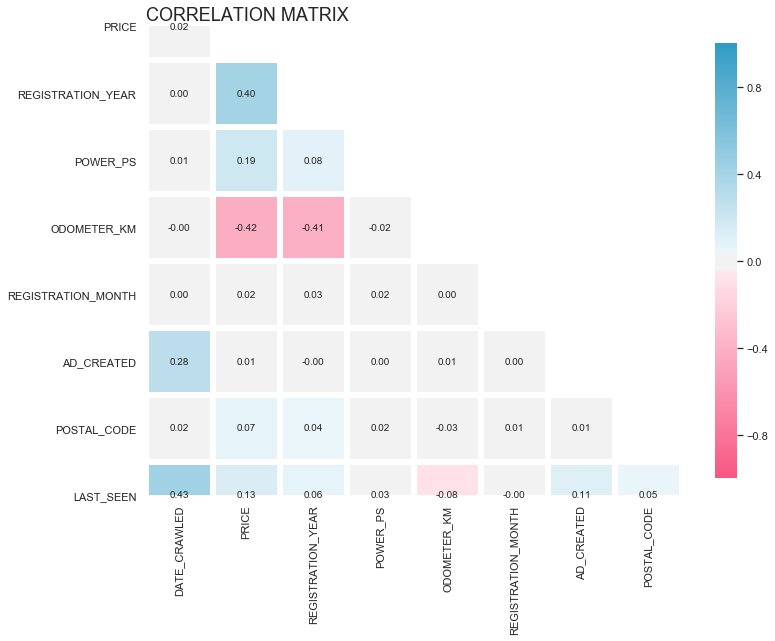

In [86]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(12, 10))

autos_corr = autos.corr()


# mask
mask = np.triu(np.ones_like(autos_corr, dtype=np.bool))


# adjust mask and df
mask = mask[1:, :-1]
corr = autos_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()



### Histograms

#### Price

Text(0.5, 1.0, 'Price')

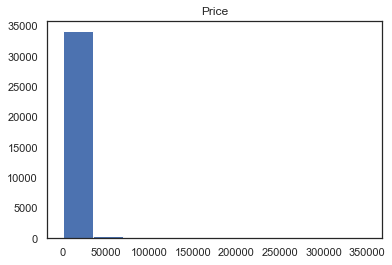

In [88]:
plt.hist(autos.price, bins=10)
plt.title("Price")

- Data is right skewed (positvely skewed)
- A lot of records has price as zero and very few has price greater than 20,000, with 28,800 being the most

#### Year of Registration

Text(0.5, 1.0, 'Year Of Registration')

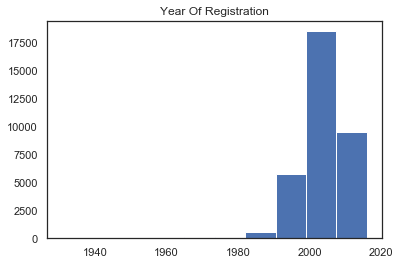

In [90]:
plt.hist(autos.registration_year, bins=10)
plt.title("Year Of Registration")

 Most of the listed cars are registered between 1980 and 2015.

#### registration_month

Text(0.5, 1.0, 'Registration_month')

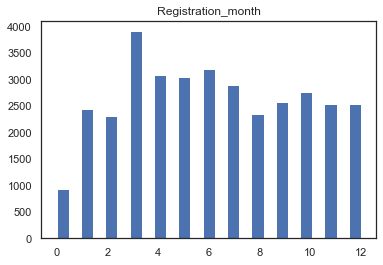

In [91]:
plt.hist(autos.registration_month, bins=25)
plt.title("Registration_month")

Most of the cars are between 10 to 20 years old

#### Kilometer

Text(0.5, 1.0, 'Kilometer')

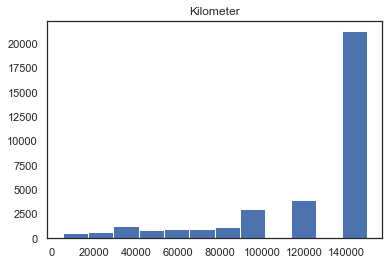

In [92]:
plt.hist(autos.odometer_km, bins=12)
plt.title("Kilometer")

Since the data is of used cars, most of the cars have milleage acquired, most of the cars have mileage between 12000 to 15000 km

Text(0.5, 1.0, 'The power of the car in PS')

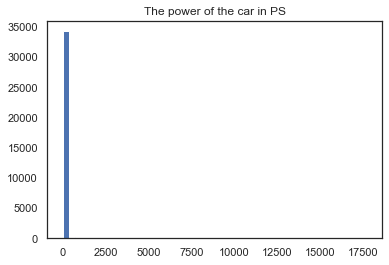

In [93]:
plt.hist(autos.power_ps , bins=50)
plt.title("The power of the car in PS")

Most of the cars came online with in 10 days

###  - Boxplot would be the best choice for outliers detection. 

### Probability Mass Function (PMF)

Dataset is divided into two parts based on the above and below the median `price' 

In [94]:
medianprice = autos.price.median()

df_highprice = autos.price[autos['price'] >= medianprice]
df_lowprice = autos.price[autos['price'] < medianprice]

df_lowprice = df_lowprice.astype(float)

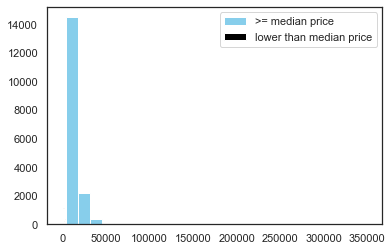

In [124]:
bins =25

plt.hist(df_highprice, bins, alpha=1, label='>= median price', color='skyblue')
plt.hist(df_lowprice, bins, alpha=1, label='lower than median price', color='black')
plt.legend(loc='upper right')
plt.show()

In [96]:
#making anew dataframe
pmf = df_highprice.value_counts().sort_index() / len(df_highprice)
pmf.head()

3900.0    0.010677
3940.0    0.000115
3945.0    0.000058
3949.0    0.000058
3950.0    0.005771
Name: price, dtype: float64

_pmf_ is normalized, total probability would be __1__.

In [97]:
pmf.sum()

1.0

In [98]:
# Used thinkstats2 module
thinkstats2.Pmf(df_highprice)

Pmf({4500.0: 0.015755756911179086, 5500.0: 0.014774629191435332, 6500.0: 0.013158654123622092, 3900.0: 0.01067697812662319, 5000.0: 0.00986899059271657, 4200.0: 0.009811277197437525, 3999.0: 0.009695850406879437, 4000.0: 0.009695850406879437, 8500.0: 0.009580423616321347, 5900.0: 0.009522710221042304, 7500.0: 0.009349570035205172, 9500.0: 0.008945576268251862, 4900.0: 0.008830149477693772, 10500.0: 0.008772436082414728, 6000.0: 0.00865700929185664, 4800.0: 0.00796444854850811, 6900.0: 0.007791308362670976, 7000.0: 0.007271887805159577, 4999.0: 0.0072141744098805334, 8900.0: 0.006925607433485312, 11500.0: 0.006867894038206267, 5200.0: 0.0068101806429272235, 8000.0: 0.006752467247648179, 12500.0: 0.006694753852369135, 7900.0: 0.006521613666532002, 5999.0: 0.0064639002712529574, 4950.0: 0.00634847348069487, 9900.0: 0.006290760085415825, 13500.0: 0.006175333294857736, 6800.0: 0.006002193109020604, 9999.0: 0.005829052923183471, 3950.0: 0.005771339527904426, 4300.0: 0.005598199342067294, 145

### Cumulative Distribution Function (CDF)

`Using **kilometer** variable`

No handles with labels found to put in legend.


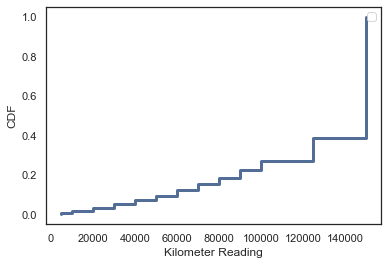

<Figure size 576x432 with 0 Axes>

In [99]:
cdf = thinkstats2.Cdf(autos.odometer_km)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Kilometer Reading', ylabel='CDF')

Observation - 

- approx 25% cars have reading under 100000 km, and about 30% cars under 120000 kilometer. 

- Common values appear vertical sections of the CDF; there are fewer values below 100000 kilometer, so the CDF in this range is flatter.

### Analytical Distribution

_ `Normal probability plot` for car price. 

It plots a model (Red line) and data (Blue Line).

In [102]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    xs = -2, 2
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='red', label='model')
    xs,ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs,ys, label='Model')

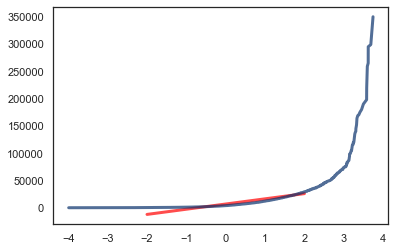

In [103]:
MakeNormalPlot(autos.price)

Observation  - As mean deviates at the ends suggesting that the expensive cars are more expensive than predicted

### Scatter Plots

#### car price vs the power of the car in PS. 

Excluding low powerPS values

No handles with labels found to put in legend.


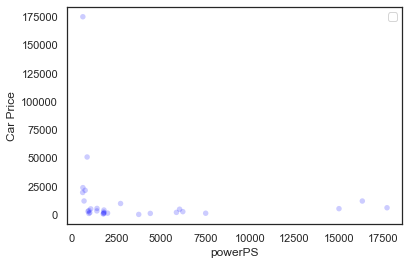

<Figure size 576x432 with 0 Axes>

In [112]:
thinkplot.Scatter(autos.power_ps[autos['power_ps'] >= 600], autos.price[autos['power_ps'] >= 600])
thinkplot.Show(xlabel='powerPS', ylabel='Car Price')

In [113]:
# Pearson coeficient
pearsonr(autos.power_ps[autos['power_ps'] >= 600], autos.price[autos['power_ps'] >=600])

(-0.15866469060610056, 0.4110326007994013)

- powerPS and Car price have positive but weak correlation.

####  Age and price

Excluded newer cars since their price is expected to be higher.

No handles with labels found to put in legend.


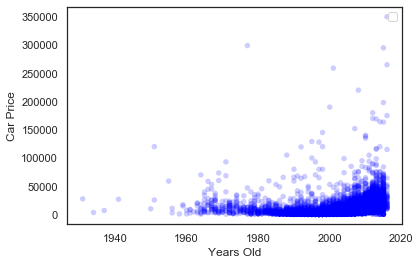

<Figure size 576x432 with 0 Axes>

In [106]:
thinkplot.Scatter(autos.registration_year[autos['registration_year'] >= 6], autos.price[autos['registration_year'] >= 6])
thinkplot.Show(xlabel='Years Old', ylabel='Car Price')

In [107]:
# Pearson coeficient
pearsonr(autos.registration_year[autos['registration_year'] >= 6], autos.price[autos['registration_year'] >= 6])

(0.3989210353167433, 0.0)


- Age is one of the factors that causes the price to change. 

- Presence of few outliers for cars older than 35 years with high price range.

### Hypothesis Testing

Test correlation.

In [108]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [109]:
# Section data the two columns that we want to test
data = autos.price.values, autos.odometer_km.values

ht = CorrelationPermute(data)
ht.PValue()

0.0

_p-value_ `0` indicates a failure to reject the null hypothesis at the 5% significance level (p,0.05).

###  Regression Analysis

 Regression Analysis of one dependent and multiple explanatory variables.

In [110]:
y = autos['price'] #value we are predicting - dependent variable
x = autos[['odometer_km', 'power_ps', 'registration_year']] #explanatory variables - Independent variables

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10101) 
#split the data 70/30

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['coefficient'])  
coeff_df 

,coefficient
odometer_km,-0.076433
power_ps,26.126443
registration_year,344.117862


As far as defination of _regression coefficient_ concerned - it is the constant that represents the rate of change of dependent variable (price) as a function of changes in the independent variables (kilometer, powerPS, yearsOld, NoOfDaysOnline)